Assignment 1

In [ ]:
import pandas as pd
import statsmodels.formula.api as sm 

url = "https://raw.githubusercontent.com/Patrick0481/Intro-to-modeling/refs/heads/main/1654308boston.csv"
BostonData = pd.read_csv(url)
#print(BostonData.head()) 


model1 = sm.ols('MEDV ~ AGE + RM', data=BostonData).fit()
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     235.3
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           9.12e-71
Time:                        11:36:08   Log-Likelihood:                -2855.2
No. Observations:                 455   AIC:                             5716.
Df Residuals:                     452   BIC:                             5729.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -482.1251     61.961     -7.781      0.0

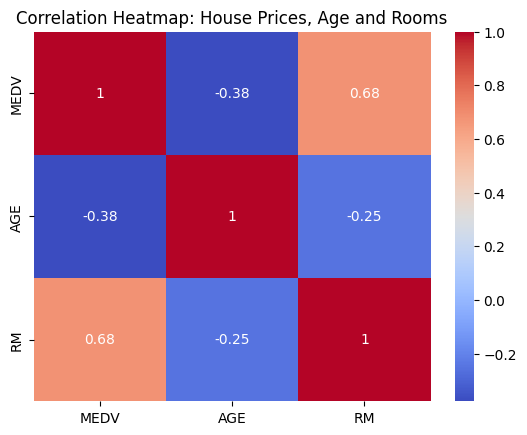

In [7]:
#Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

Collums = ['MEDV', 'AGE', 'RM'] 
CorrelationMatrix = BostonData[Collums].corr()

sns.heatmap(CorrelationMatrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap: House Prices, Age and Rooms')
plt.show()

In [ ]:
model2 = sm.ols('MEDV ~ AGE + RM + CRIM + INDUS + NOX + DIS + RAD + TAX + PTRATIO + LANDMARK', data=BostonData).fit()
print(model2.summary())

#When runnin this code it give a note saying that the condition number is large, 1e+18. This might indicate that there is
#strong multicollinearity


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     261.5
Date:                Thu, 23 Oct 2025   Prob (F-statistic):          8.50e-198
Time:                        11:49:32   Log-Likelihood:                -2525.2
No. Observations:                 455   AIC:                             5078.
Df Residuals:                     441   BIC:                             5136.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #import the VIF function
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# Create a copy of the data without the target variable
X = BostonData.drop(columns=['MEDV'])

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, columns=['CHAS', 'LANDMARK'], drop_first=True)

# Convert boolean columns to int
X = X.astype(float)

# Calculate VIF for each variable
VIF_data = pd.DataFrame()
VIF_data["variable"] = X.columns
VIF_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]

# Sort by VIF value in descending order
VIF_data = VIF_data.sort_values('VIF', ascending=False)
print(VIF_data)

#he VIF results clearly show a multicollinearity problem
#Variables like RM, PTRATIO, NOX, TAX have VIF values > 10, meaning they are strongly correlated with other predictors


                  variable        VIF
3                       RM  86.700592
8                  PTRATIO  85.342630
2                      NOX  74.675255
7                      TAX  58.664891
10    LANDMARK_No Landmark  39.161748
4                      AGE  19.701094
6                      RAD  14.871396
1                    INDUS  14.777484
5                      DIS  13.100940
11           LANDMARK_Park   5.894636
12  LANDMARK_Shopping Mall   5.480700
0                     CRIM   1.948197
13        LANDMARK_Stadium   1.791045
9                 CHAS_yes   1.161228


In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif #import the VIF function
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

y = BostonData['MEDV']

# Create dummy variables for LANDMARK
BostonData_dummies = pd.get_dummies(BostonData, columns=['LANDMARK'], drop_first=True)

# Select relevant columns including dummies
X = BostonData_dummies[['CRIM', 'DIS', 'RAD', 'AGE', 'INDUS', 'LANDMARK_Park', 'LANDMARK_Shopping Mall', 'LANDMARK_Stadium']]

# Convert boolean columns to int
X[['LANDMARK_Park', 'LANDMARK_Shopping Mall', 'LANDMARK_Stadium']] = X[['LANDMARK_Park', 'LANDMARK_Shopping Mall', 'LANDMARK_Stadium']].astype(int)

# Add constant
X = sm.add_constant(X)

# Fit the reduced model
model_reduced = sm.OLS(y, X).fit()
print(model_reduced.summary())

# Check new VIFs
VIF_data = pd.DataFrame()
VIF_data["Variable"] = X.columns
VIF_data["VIF"] = [vif(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors (after cleaning):")
print(VIF_data)

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     97.85
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           3.47e-93
Time:                        12:24:13   Log-Likelihood:                -2787.0
No. Observations:                 455   AIC:                             5592.
Df Residuals:                     446   BIC:                             5629.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    619

C:\Users\patri\AppData\Local\Temp\ipykernel_15148\1374549600.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['LANDMARK_Park', 'LANDMARK_Shopping Mall', 'LANDMARK_Stadium']] = X[['LANDMARK_Park', 'LANDMARK_Shopping Mall', 'LANDMARK_Stadium']].astype(int)
